In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,37480,None,None,85822.301122
2020-06-13,37481,None,None,79734.230603
2020-06-14,37482,None,None,74079.322506
2020-06-15,37483,None,None,68752.501510
2020-06-16,37484,None,None,64007.958079
...,...,...,...,...
2021-03-07,37748,None,None,122975.753886
2021-03-08,37749,None,None,118959.770706
2021-03-09,37750,None,None,114925.617844


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-11_2021-03-11-17-13.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-10_2021-03-10-16-27.pickle


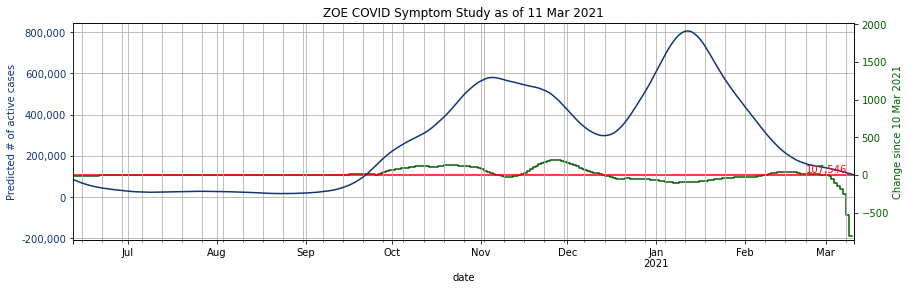

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

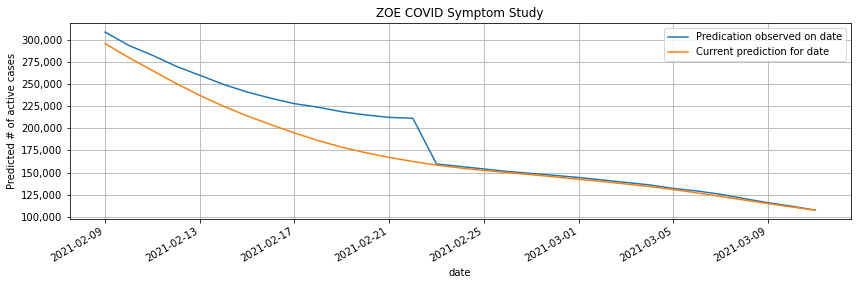

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-11_2021-03-11-17-13.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
161,East Lindsey,E07000137,1.049633
189,West Lindsey,E07000142,1.006557
70,North East Derbyshire,E07000038,0.878444
326,Isle of Anglesey,W06000001,0.803181
65,Amber Valley,E07000032,0.736076
240,Rotherham,E08000018,0.709817
274,Wigan,E08000010,0.694993
93,Epping Forest,E07000072,0.633345
280,Doncaster,E08000017,0.619334
232,Welwyn Hatfield,E07000241,0.598325
